## Key Clouds

In [1]:
import pandas as pd
import numpy as np

In [2]:
#!pip install nltk

In [3]:
#!pip install pywaffle

In [4]:
#conda install -c conda-forge wordcloud

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import base64
import string
import re
import nltk

from collections import Counter
from time import time
# from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS as stopwords
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
#!pip install pywaffle
from pywaffle import Waffle

from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
nltk.download('genesis')

[nltk_data] Downloading package genesis to /home/jovyan/nltk_data...
[nltk_data]   Package genesis is already up-to-date!


True

In [8]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [31]:
df = pd.read_csv('comments.csv')
df['textOriginal'] = df['textOriginal'].str.replace("\n" , "  ")
df['textOriginal'] = df['textOriginal'].str.replace("\'", " ")
df.head()

,videoId,textDisplay,textOriginal,authorDisplayName,authorProfileImageUrl,authorChannelUrl,authorChannelId,canRate,viewerRating,likeCount,publishedAt,updatedAt,videoTitle,videoDate
0,ehmyaX0lJew,Je vote pour que l&#39;hymne national soit &qu...,"Je vote pour que l hymne national soit ""Never ...",fauteuillouisxv,https://yt3.ggpht.com/ytc/AKedOLRiOIE_FfOYMmtJ...,http://www.youtube.com/channel/UCB3SlhavTJwpvQ...,UCB3SlhavTJwpvQslrjYfvlA,True,none,4363,2021-11-01T14:31:33Z,2021-11-01T14:31:33Z,Pourquoi l&#39;évolution se répète en boucle -...,2021-12-12T13:00:37Z
1,ehmyaX0lJew,Une idée d’hymne pour le pays ? 🤔,Une idée d’hymne pour le pays ? 🤔,YouTube,https://yt3.ggpht.com/584JjRp5QMuKbyduM_2k5RlX...,http://www.youtube.com/channel/UCBR8-60-B28hp2...,UCBR8-60-B28hp2BmDPdntcQ,True,none,887,2021-11-04T18:46:45Z,2021-11-04T18:46:45Z,Pourquoi l&#39;évolution se répète en boucle -...,2021-12-12T13:00:37Z
2,ehmyaX0lJew,&quot;Ce sera internet le territoire&quot; ça ...,"""Ce sera internet le territoire"" ça me fait me...",Do,https://yt3.ggpht.com/ytc/AKedOLSR54io4bDtzKIN...,http://www.youtube.com/channel/UC91xKGD78Fjsyi...,UC91xKGD78FjsyijwAKSEBpw,True,none,521,2021-11-02T10:18:34Z,2021-11-02T10:21:44Z,Pourquoi l&#39;évolution se répète en boucle -...,2021-12-12T13:00:37Z
3,ehmyaX0lJew,Je veux absolument un passeport de Dirtybiolog...,Je veux absolument un passeport de Dirtybiolog...,Dark,https://yt3.ggpht.com/Cv3SNTMi0KHR4x3goJUK7VlR...,http://www.youtube.com/channel/UC6hZ64RB21tnY-...,UC6hZ64RB21tnY-M7jfguuzg,True,none,2,2021-11-26T15:00:01Z,2021-11-26T15:00:01Z,Pourquoi l&#39;évolution se répète en boucle -...,2021-12-12T13:00:37Z
4,ehmyaX0lJew,Je veux absolument un passeport de Dirtybiolog...,Je veux absolument un passeport de Dirtybiolog...,Jeffrey 75,https://yt3.ggpht.com/ytc/AKedOLRDIEz77_NQDNnm...,http://www.youtube.com/channel/UCIOWsD3jQ44JZA...,UCIOWsD3jQ44JZA2E1DNgZTg,True,none,107,2021-11-02T08:12:55Z,2021-11-02T08:12:55Z,Pourquoi l&#39;évolution se répète en boucle -...,2021-12-12T13:00:37Z


In [12]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
#% matplotlib inline

In [15]:
import warnings
warnings.filterwarnings("ignore")

In [45]:
# Start with one review:
text = " ".join(df['textOriginal'])
type(text)

str

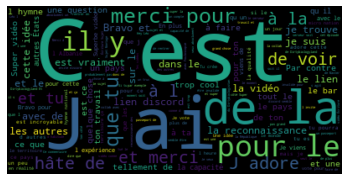

In [46]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [40]:
stopwords = set(STOPWORDS)
#stopwords.update(["drink", "now", "wine", "flavor", "flavors"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(df['textOriginal'])

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

TypeError: expected string or bytes-like object

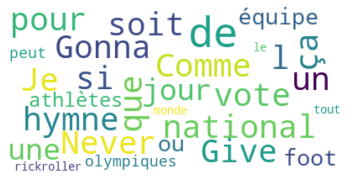

In [34]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# Save the image in the img folder:
#wordcloud.to_file("img/first_review.png")